In [1]:
import globals as gl
from main import main
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
from plot import decor, add_significance_brackets, add_significance_asterisks
import os
warnings.filterwarnings("ignore")

import matplotlib
print(f'matplotlib backend: {matplotlib.get_backend()}')


Base directory found: /Users/mnlmrc/Library/CloudStorage/GoogleDrive-mnlmrc@unife.it/My Drive/UWO/ExtFlexChord
matplotlib backend: module://matplotlib_inline.backend_inline


# **Success rate**

Text(0.5, 0, 'day')

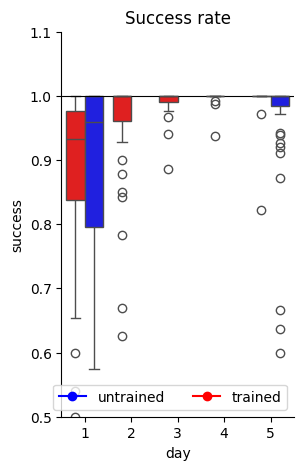

In [2]:
experiment = 'efc2'
participant_id = gl.participants[experiment] # ['subj108', 'subj109', 'subj110', 'subj111']
fig, axs = plt.subplots(figsize=(3, 5))
fig, ax, custom_handles = main('PLOT:success', experiment=experiment, participant_id=participant_id, fig=fig, axs=axs)

ax.legend(handles=custom_handles, loc='lower right', ncol=2)

ax.set_ylim([.5, 1.1])
ax.axhline(1, color='k', lw=.8)

ax.spines[['right', 'top']].set_visible(False)

# ax.set_yscale('symlog', linthresh=1)

ax.set_title('Success rate')
ax.set_ylabel('success')
ax.set_xlabel('day')


# **Reaction time**

Text(0.5, 0, 'day')

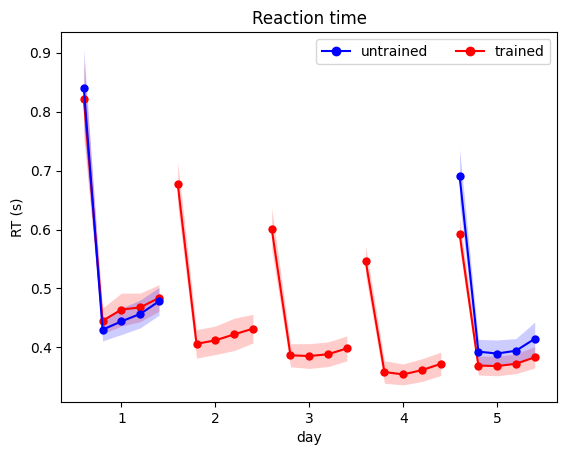

In [3]:
fig, axs = plt.subplots()
fig, axs, custom_handles = main('PLOT:metric_repetition', experiment, metric='RT', fig=fig, axs=axs)

axs.legend(handles=custom_handles, loc='upper right', ncol=2)

axs.set_title('Reaction time')
axs.set_ylabel('RT (s)')
axs.set_xlabel('day')

# **Example force patterns for trained and untrained chords**
In trained chords, isometric forces produced by each finger become more simultaneous after training. Chord execution also becomes faster. Below are two trials taken from the same participant performing chord 91211 (thumb: still, index:extended, middle: flexed, ring: extended, pinkie: exptened) on day 1 (before training) and day 5 (after training).  

Text(0.5, 0.01, 'time (s)')

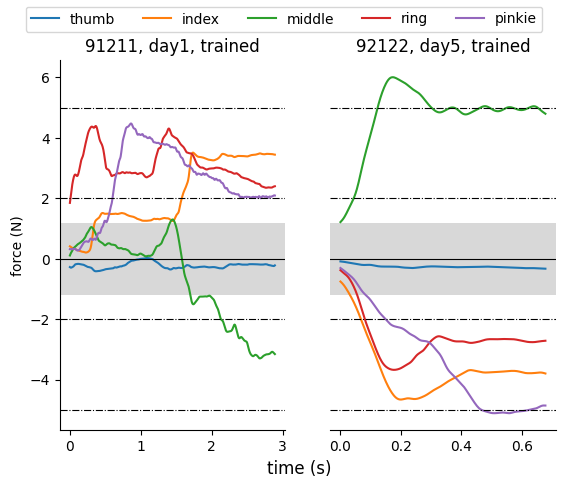

In [4]:
participant_id = 'subj100'
session = 'testing'
day = '1'
ntrial = 1

fig, axs = plt.subplots(1, 2, sharey=True)
_, ax, chordID, day, chord = main('PLOT:force_in_trial', experiment, participant_id, session, day, ntrial=ntrial, fig=fig, axs=axs[0])
ax.set_ylabel('force (N)')
ax.set_title(f'{chordID}, day{day}, {chord}')

ax.spines[['right', 'top']].set_visible(False)

day = '5'
ntrial = 41
_, ax, chordID, day, chord = main('PLOT:force_in_trial', experiment, participant_id, session, day, ntrial=ntrial, fig=fig, axs=axs[1])
ax.set_title(f'{chordID}, day{day}, {chord}')

ax.spines[['right', 'top', 'left']].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

fig.legend(gl.channels['force'], loc='upper center', ncol=5)

fig.supxlabel('time (s)')

In untrained chords, execution improves slightly, but remanins less simultaneous and slower compared to trained chords. Below are two example trials of the untrained chord 21291 (thumb: flexed, index:extended, middle: flexed, ring: still, pinkie: extended) on day 1 and day 5 performed by the same participant.

Text(0.5, 0.01, 'time (s)')

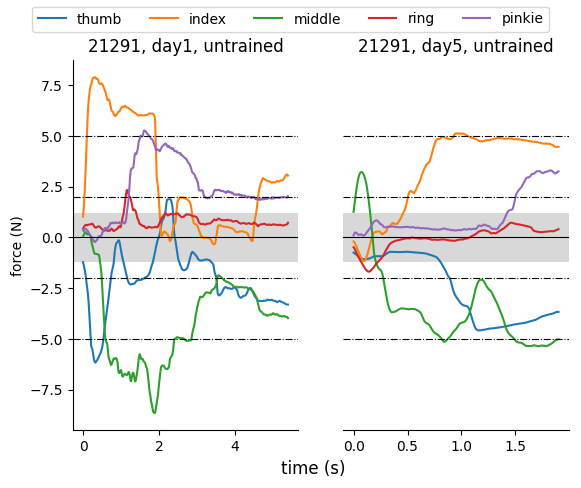

In [5]:
experiment = 'efc2'
participant_id = 'subj100'
session = 'testing'
day = '1'
ntrial = 9

fig, axs = plt.subplots(1, 2, sharey=True)
_, ax, chordID, day, chord = main('PLOT:force_in_trial', experiment, participant_id, session, day, ntrial=ntrial, fig=fig, axs=axs[0])
ax.set_ylabel('force (N)')
ax.set_title(f'{chordID}, day{day}, {chord}')

ax.spines[['right', 'top']].set_visible(False)

day = '5'
ntrial = 34
_, ax, chordID, day, chord = main('PLOT:force_in_trial', experiment, participant_id, session, day, ntrial=ntrial, fig=fig, axs=axs[1])
ax.set_title(f'{chordID}, day{day}, {chord}')

ax.spines[['right', 'top', 'left']].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

fig.legend(gl.channels['force'], loc='upper center', ncol=5)

fig.supxlabel('time (s)')

# **Execution time**

Text(0.5, 0, 'day')

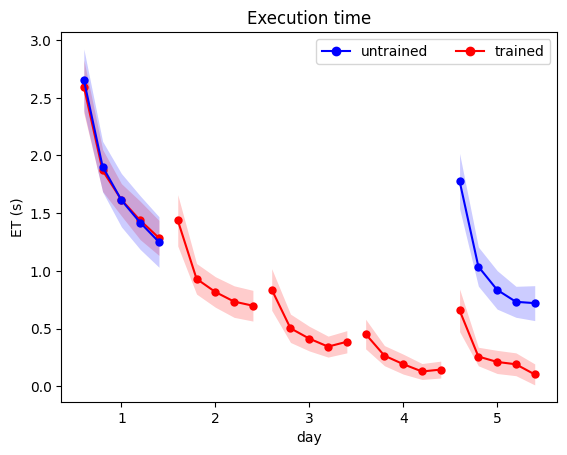

In [6]:
fig, axs = plt.subplots()
fig, axs, custom_handles = main('PLOT:metric_repetition', experiment, metric='ET', fig=fig, axs=axs)

axs.legend(handles=custom_handles, loc='upper right', ncol=2)

axs.set_title('Execution time')
axs.set_ylabel('ET (s)')
axs.set_xlabel('day')

# **Mean deviation**

Text(0.5, 0, 'day')

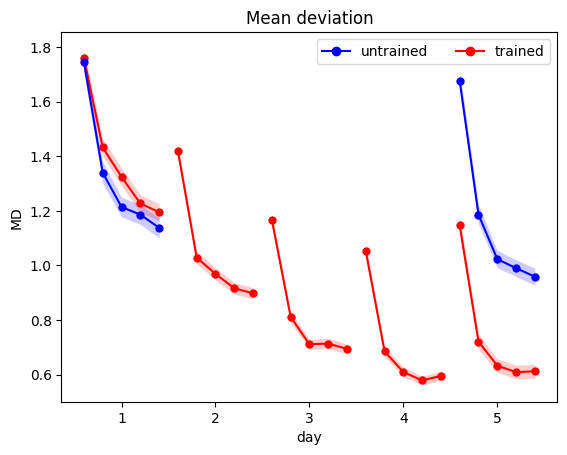

In [7]:
metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.csv'))

fig, axs = plt.subplots()

offset = 5
metrics['offset'] = metrics['repetition'] + metrics['day'] * offset

sns.lineplot(data=metrics[metrics['chord'] == 'trained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se',
             palette=['red'] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=metrics[metrics['chord'] == 'untrained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se',
         palette=['blue'] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
axs.set_xticks(np.linspace(8, 28, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained'),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained')       
            ]

axs.legend(handles=custom_handles, loc='upper right', ncol=2)

axs.set_title('Mean deviation')
axs.set_ylabel('MD')
axs.set_xlabel('day')


Text(0.5, 0, 'day')

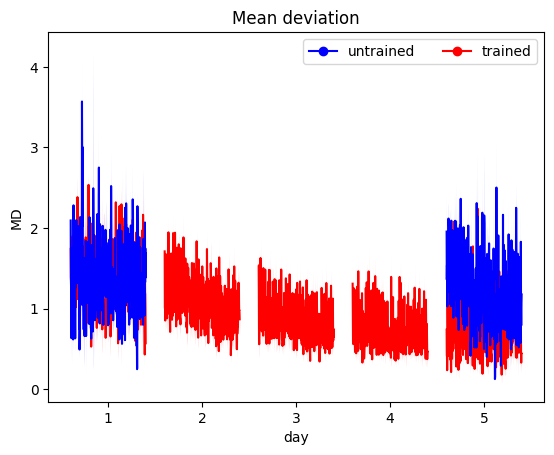

In [8]:
fig, axs = plt.subplots()

offset = 500
metrics['TN_tot'] = metrics['TN'] + 50 * (metrics['BN'] - 1)
metrics['offset'] = metrics['TN_tot'] + metrics['day'] * offset

sns.lineplot(data=metrics[metrics['chord'] == 'trained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se',
             palette=['red'] * 5, markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=metrics[metrics['chord'] == 'untrained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se',
         palette=['blue'] * 2, markeredgewidth=0, err_kws={'linewidth': 0})
axs.set_xticks(np.linspace(700, 2700, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained'),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained')       
            ]

axs.legend(handles=custom_handles, loc='upper right', ncol=2)

axs.set_title('Mean deviation')
axs.set_ylabel('MD')
axs.set_xlabel('day')

# **Cross-correlation**

## **Average inter-finger lag for example chords**

Text(0.5, 0.98, 'Average lag at maximum cross-correlation\nbetween finger pairs (chord: 91211, trained, N=12)')

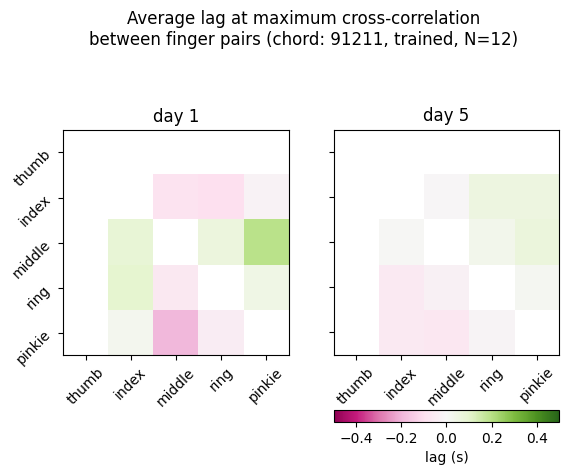

In [9]:
participant_id = gl.participants[experiment]
chordID = 91211
chord = 'trained'

fig, axs = plt.subplots(1, 2, sharey=True)

day = '1'
fig, ax, _ = main('PLOT:xcorr_chord', experiment, participant_id=participant_id,chordID=chordID, chord=chord, day=day, fig=fig, axs=axs[0])
ax.set_title('day 1')

day = '5'
fig, ax, cax = main('PLOT:xcorr_chord', experiment, participant_id=participant_id,chordID=chordID, chord=chord, day=day, fig=fig, axs=axs[1])
ax.set_title('day 5')

cbar = fig.colorbar(cax, ax=ax, orientation='horizontal', location='bottom', fraction=0.046)
cbar.set_label('lag (s)')

fig.suptitle(f'Average lag at maximum cross-correlation\nbetween finger pairs (chord: {chordID}, {chord}, N={len(participant_id)})')

Text(0.5, 0.98, 'Average lag at maximum cross-correlation\nbetween finger pairs (chord: 21291, untrained, N=12)')

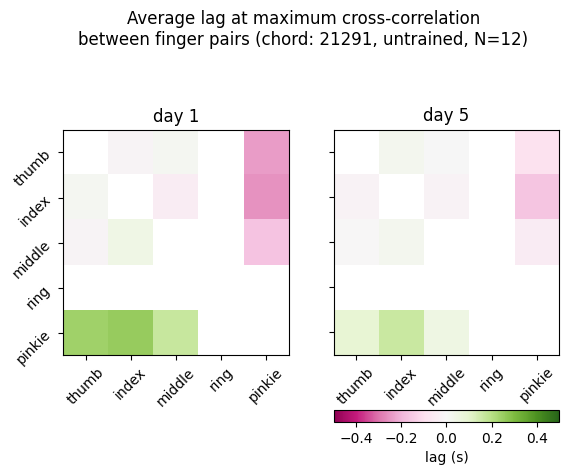

In [10]:
chordID = 21291
chord = 'untrained'

fig, axs = plt.subplots(1, 2, sharey=True)

day = '1'
fig, ax, _ = main('PLOT:xcorr_chord', experiment, participant_id=participant_id,chordID=chordID, chord=chord, day=day, fig=fig, axs=axs[0])
ax.set_title('day 1')

day = '5'
fig, ax, cax = main('PLOT:xcorr_chord', experiment, participant_id=participant_id,chordID=chordID, chord=chord, day=day, fig=fig, axs=axs[1])
ax.set_title('day 5')

cbar = fig.colorbar(cax, ax=ax, orientation='horizontal', location='bottom', fraction=0.046)
cbar.set_label('lag (s)')

fig.suptitle(f'Average lag at maximum cross-correlation\nbetween finger pairs (chord: {chordID}, {chord}, N={len(participant_id)})')

## **Inter-finger lag decreases during training**

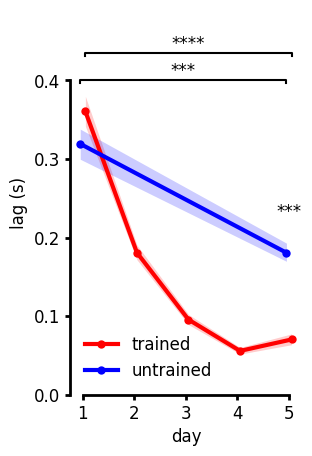

In [11]:
tau = pd.read_csv(os.path.join(gl.baseDir, experiment, 'tau.tsv'), sep='\t')

fig, axs = plt.subplots(figsize=(3, 5))

# add dodge to day
tau.loc[tau['chord'] == 'trained', 'dday'] = tau.loc[tau['chord'] == 'trained', 'day'].astype('float') + .05
tau.loc[tau['chord'] == 'untrained', 'dday'] = tau.loc[tau['chord'] == 'untrained', 'day'].astype('float') - .05

# plot tau
sns.lineplot(data=tau, x='dday', y='tauAbs', hue='chord', marker='o', lw=3, ax=axs, err_kws={'linewidth': 0}, 
             markeredgecolor='none', palette=['red', 'blue'])

tau_avg = tau.groupby(['dday', 'participant_id', 'chord', 'day'])['tauAbs'].mean().reset_index()


# add significance
y_max = add_significance_brackets(ax=axs, data=tau_avg[tau_avg['chord'] == 'untrained'], x='dday', y='tauAbs', pairs=[(.95, 4.95)],
                          test_type='t-test_rel', text_format='star')
add_significance_brackets(ax=axs, data=tau_avg[tau_avg['chord'] == 'trained'], x='dday', y='tauAbs', pairs=[(1.05, 5.05)],
                          test_type='t-test_rel', text_format='star', y_max=y_max + .075 * y_max)
add_significance_asterisks(ax=axs, data=tau_avg, x='day', y='tauAbs', x_point=5, hue='chord',
                          test_type='t-test_rel', text_format='star')

# cosmetics
axs.set_ylabel('lag (s)', fontsize=12)
axs.set_xlabel('day', fontsize=12)
axs.legend(frameon=False, fontsize=12)
decor(axs=axs, fontsize=12, ylim=(0, .49), spines_width=2, xbounds=(1, 5), ybounds=(0, .4))



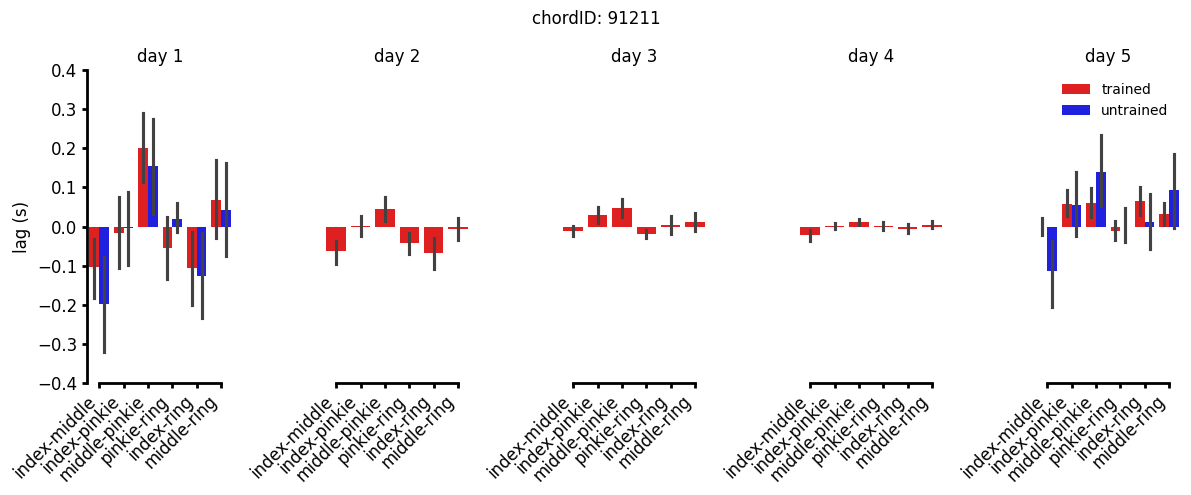

In [12]:
experiment = 'efc2'
tau = pd.read_csv(os.path.join(gl.baseDir, experiment, 'tau.tsv'), sep='\t')
chordIDs = tau['chordID'].unique()

fig, axs = plt.subplots(1, 5, sharey=True, figsize=(12, 5))

chordID = 91211
for day in range(1, 6):
    
    tau_tmp = tau[(tau['chordID'] == chordID) & (tau['day'] == day)]
    
    chord = list(tau_tmp['chord'])
    tau_tmp = tau_tmp.iloc[:, 8:]
    
    finger_combinations = tau_tmp.columns
    unique_combinations = set(
        '-'.join(sorted(combo.split('-'))) for combo in finger_combinations
    )

    tau_tmp = tau_tmp[list(unique_combinations)]
    tau_tmp['chord'] = chord
    
    tau_tmp = tau_tmp.melt(var_name='finger', value_name='lag', id_vars='chord')
    tau_tmp = tau_tmp.dropna()
    
    sns.barplot(ax=axs[day-1], data=tau_tmp, y='lag', x='finger', hue='chord', palette=['red', 'blue'])

    axs[day-1].set_ylim([-.4, .4])
    
    axs[day-1].spines['bottom'].set_bounds(0, 5)
    axs[day-1].spines['left'].set_bounds(-.4, .4)
    axs[day-1].spines[['right', 'top', 'left']].set_visible(False)
    axs[day-1].spines[['left', 'bottom']].set_linewidth(2)
    axs[day-1].tick_params(axis='both', width=2)
    axs[day-1].tick_params(axis='y', left=False)

    axs[day-1].set_xlabel('')
    axs[day-1].set_ylabel('lag (s)', fontsize=12)

    axs[day-1].set_title(f'day {day}', fontsize=12)
    
    axs[day-1].set_xticklabels(axs[day-1].get_xticklabels(), rotation=45, ha='right', fontsize=12)

    axs[day-1].legend().remove()

axs[0].tick_params(axis='y', left=True)
axs[0].spines['left'].set_visible(True)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=12)

axs[-1].legend(frameon=False, loc='upper right', fontsize=12)

fig.suptitle(f'chordID: {chordID}')

fig.tight_layout()


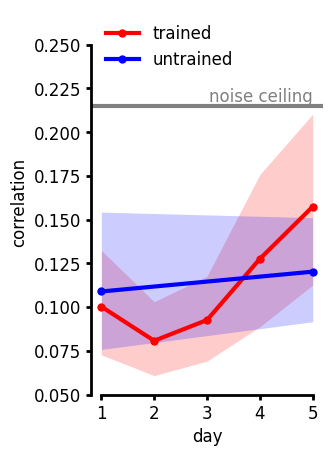

In [13]:
experiment = 'efc2'

corr = pd.read_csv(os.path.join(gl.baseDir, experiment, 'corr.tsv'), sep='\t')
noise_ceiling = pd.read_csv(os.path.join(gl.baseDir, experiment, 'corr_noise_ceiling.tsv'), sep='\t')

fig, axs = plt.subplots(figsize=(3, 5))

sns.lineplot(data=corr, ax=axs, y='corr', x='day', hue='chord', palette=['red', 'blue'], marker='o', markeredgecolor='none', 
             lw=3, err_kws={'linewidth': 0})

axs.axhline(noise_ceiling.mean()['corr'], color='grey', lw=3)
axs.text(5, noise_ceiling.mean()['corr'], 'noise ceiling', color='grey', ha='right', va='bottom', fontsize=12)
axs.set_ylabel('correlation', fontsize=12)
axs.set_xlabel('day', fontsize=12)
axs.legend(frameon=False, fontsize=12, loc='upper left')
decor(axs=axs, fontsize=12, ylim=(.05, .27), spines_width=2, xbounds=(1, 5), ybounds=(.05, .25))

## **Inter-finger lag is not consistent across trials**

If participants employed a consistent chunking or sequencing strategy to achieve the hand configurations required in the task, then the pattern of cross-correlation between fingers should remain stable across trials. To assess this, I calculated the average correlation between cross-correlation patterns observed in different trials on each day. As a comparison, I shuffled the lags measured between paired of fingers and calculated the correlation again using shuffled data (10 permutations). The average correlation between cross-correlation patterns is not significantly higher than the correlation measured using shuffled data. 

In [ ]:
participant_id = gl.participants[experiment]



# **Non-negative matrix factorization (NNMF)**

## **Dimensionality of chord and natural datasets**
Non-negative Matrix Factorization (NNMF) decomposes EMG activity patterns by decomposing the EMG activity patterns into a set of non-negative basis vectors and corresponding activation coefficients. Basis vector can be interpreted as governing muscle activation:

$$
\mathbf{V} \approx \mathbf{W} \mathbf{H}
$$

Where:
- $\mathbf{V} \in \mathbb{R}^{m \times n}_+$ is the original non-negative matrix (e.g., EMG signals).
- $\mathbf{W} \in \mathbb{R}^{m \times r}_+$ is the non-negative matrix of basis vectors (representing synergies).
- $\mathbf{H} \in \mathbb{R}^{r \times n}_+$ is the non-negative matrix of activation coefficients.


In [ ]:
experiment = 'efc1'
participant_id = gl.participants[experiment]
chords, natural = main('EMG:nnmf', experiment, participant_id)

I applied NNMF separately to the chords and natural dataset. Below it is shown the median number of synergies required to explain >90% of variance in each dataset:

In [ ]:
print(f'chords: {np.median(np.array(chords["k"]))}, R²: {np.array(chords["r2"]).mean()}\nnatural: {np.median(np.array(natural["k"]))}, R²: {np.array(natural["r2"]).mean()}')

## **Reconstruction of chord and natural datasets**
I reconstructed the chord dataset using the synergies extracted from the natural dataset, and the natural dataset using the chords. To reconstruct the chord dataset using natural synergies, I first calculated the non-negative matrix of activation coefficients $H_{natural\to chord}$ that minimizes the L2-norm:

$$
H_{natural\to chord}=\min_{\mathbf{H} \geq 0} \|\mathbf{V_{chord}} - \mathbf{W_{natural}} \mathbf{H_{natural\to chord}} \|_2^2
$$

Where:
- $\mathbf{V_{chord}} \in \mathbb{R}^{10 \times 68}_+$ is the original chord dataset (10 channels, 68 chords).
- $\mathbf{W_{natural}} \in \mathbb{R}^{10 \times r}_+$ are the $r$ synergies extracted from the natural dataset.
- $\mathbf{H_{natural\to chord}} \in \mathbb{R}^{r \times 68}_+$ is a non-negative matrix of activation coefficients.

Similarly, to reconstruct the natural dataset from chords, I first found $H_{natural\to chord}$ such that:

$$
H_{natural\to chord} = \min_{\mathbf{H} \geq 0} \|\mathbf{V_{natural}} - \mathbf{V_{chord}} \mathbf{H_{chord\to natural}} \|_2^2
$$

Where:
- $\mathbf{V_{natural}} \in \mathbb{R}^{10 \times n}_+$ is the original natural dataset (10 channels, n timepoints).
- $\mathbf{V_{chord}} \in \mathbb{R}^{10 \times 68}_+$ is the original chord dataset.
- $\mathbf{H_{chord\to natural}} \in \mathbb{R}^{r \times 68}_+$ is a non-negative matrix of activation coefficients.

Then, I calculated:

$$
\mathbf{\hat{V_{chord}}} = \mathbf{W_{natural}} \mathbf{H_{natural\to chord}}
$$

And:

$$
\mathbf{\hat{V_{natural}}} = \mathbf{V_{chord}} \mathbf{H_{chord\to natural}}
$$

The figure below shows the $R^2$ as an index of the goodness of reconstruction. $R^2$ may be different between two reconstruction due to the different number of chords/syenrgies empolyed. To account for this, I also performed the two reconstruction using shuffled versions of $V_{chord}$ and $V_{natural}$ (dashed line in the figure). Finally, because EMG data are affected by measurament noise, perfect reconstruction is hardly achievable. To estimate the noise ceiling in the chord dataset, I first calculate the average pattern of EMG activation for each chord across participant $V_{chordAvg}$, then I calculated:

$$
B=\min_{\mathbf{H} \geq 0} \|\mathbf{V_{chordAvg}} - \mathbf{V_{chordParticipant}} \mathbf{B} \|_2^2
$$

Where $V_{chordParticipant}$ is the chord datatset recorded in a single participant. I then obtained:

$$
\mathbf{\hat{V_{chordAvg}}} = \mathbf{V_{chordParticipant}} \mathbf{B}
$$

And calculated $R^2$ in each participant. $R^2$ averaged across participant was taken as a measure of noise ceiling. In the natural dataset, each participant's data are divided into several partitions. Because during the task participants were freely exploring the natural workspace, estimating the noise ceiling cannot simply be done by predicting one partition using another one, or using the average activity in each partition. Therefore, to estimate the noise ceiling, I extracted the motor synergies from a given partitition using NNMF. Then, I estimated the activation coefficient for each synergy in another partition using the same non-negative optimization approach described above. Finally, I estimated the EMG pattern in the second partition and calculated $R^2$ to assess the goodness of reconstruction. The noise ceiling was estimate by averaging $R^2$ across partitions and participants.

In [ ]:
fig, axs = plt.subplots(figsize=(4, 5))
fig, ax, pval = main('PLOT:recon_emg', experiment, participant_id, fig=fig, axs=axs)

ax.set_xlim(-1.6, 2.6)
ax.set_title('EMG reconstruction')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('')
ax.set_xticks([0, 1])
ax.set_xticklabels(['natural from chords', 'chords from natural'], rotation=45, ha='right')

print(pval)
ax.text(0, .85, '*', color='dimgrey', va='center', ha='right')
ax.text(0, .85, '*', color='k', va='center', ha='left')